# Rydberg back-end workflow demonstration

In cold atoms, we can also work with qubits. As an example, we implemented here the operation on a tweezer array as it is implemented in various labs around the world. In this notebook we present the communication with our API. The communication with the backend happens through the four url

1. '.../api/v1/rydberg/get_config/' 
2. '.../api/v1/rydberg/post_job/'
3. '.../api/v1/rydberg/get_job_status/'
4. '.../api/v1/rydberg/get_job_result/'

## Preparation for local deployment

Some first things that you have to do:

- Apply any migrations to your local server `python manage.py migrate --settings main.local_settings`
- Start the server in a tab as `python manage.py runserver --settings main.local_settings`
- You created an account and saved this in the local `credentials.py` file

# get config

Getting the description of the simulator/backend as a json file

* user login  at '.../get_config'
* json file with simulator/backend description 

In [23]:
import requests
import json
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

This imports the `credentials.py` file you received from us.

In [24]:
#from heroku_credentials import username, password
from credentials import username, password

In [36]:
url_prefix = 'http://localhost:8000/api/v1/rydberg/'

In [37]:
url= url_prefix + "get_config"
pprint(url)
r = requests.get(url)
pprint(r.json())

'http://localhost:8000/api/v1/rydberg/get_config'
{'backend_name': 'alqor_rydberg_simulator',
 'backend_version': '0.0.1',
 'basis_gates': ['rx', 'rz', 'cblock'],
 'cold_atom_type': 'spin',
 'conditional': False,
 'coupling_map': 'linear',
 'description': 'A chain of qubits realized through Rydberg atoms.',
 'display_name': 'rydberg',
 'dynamic_reprate_enabled': False,
 'gates': [{'coupling_map': [[0], [1], [2], [3], [4]],
            'description': 'Evolution under RX',
            'name': 'rx',
            'parameters': ['omega'],
            'qasm_def': 'gate rx(omega) {}'},
           {'coupling_map': [[0], [1], [2], [3], [4]],
            'description': 'Evolution under the RZ gate',
            'name': 'rz',
            'parameters': ['delta'],
            'qasm_def': 'gate rz(delta) {}'},
           {'coupling_map': [[0, 1, 2, 3, 4]],
            'description': 'Apply the Rydberg blockade over the whole array',
            'name': 'cblock',
            'parameters': ['delta'],
 

# The Rydberg tweezer backend

It implements five tweezer sites with possibility of spin up and down. 

 We have implemented:
 
 - `rx` which applies a $x$ local rotation to the qubit.
 - `rz` which applies a $x$ local rotation to the qubit.
 - `cblock` which describes interactions between rydberg atoms.
 - `measure` which reads out the occupation.

# RX

We will now start with a local x rotation.


In [39]:
job_payload = {
    'experiment_0': {
    'instructions': [
        ('rx', [0], [np.pi]),
        ('measure', [0], []),
        ],
        'num_wires': 2,
        'shots': 4,
        "wire_order": "sequential",
    },
}

In [40]:
url= url_prefix + "post_job" 

pprint(url)
job_response = requests.post(url, json={'job':json.dumps(job_payload),'username': username,'password':password})
job_id = (job_response.json())['job_id']
print(job_response.json())

'http://localhost:8000/api/v1/rydberg/post_job'
{'job_id': '20230301_093040-rydberg-freddy-c6882', 'status': 'INITIALIZING', 'detail': 'Got your json.', 'error_message': 'None'}


test the job status

In [41]:
url= url_prefix + "get_job_status" 

status_response = requests.get(url, params={'job_id': job_id,'username': username,'password':password})

print(status_response.text)

{"job_id": "20230301_093040-rydberg-freddy-c6882", "status": "DONE", "detail": "None; Passed json sanity check; Compilation done. Shots sent to solver.", "error_message": "None"}


job result

In [47]:
url= url_prefix + "get_job_result" 

result_response = requests.get(url, params={'job_id': job_id,'username': username,'password':password})

pprint(result_response.json())

{'backend_name': 'alqor_rydberg_simulator',
 'backend_version': '0.0.1',
 'header': {},
 'job_id': '20230301_093423-rydberg-freddy-68370',
 'qobj_id': None,
 'results': [{'data': {'memory': ['0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0']},
              'header': {'extra metadata': 'text', 'name': 'experiment_0'},
              'shots': 9,
              'success': True},
             {'data': {'memory': ['0 0',
                                  '1 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
          

## Rabi oscillation

In [43]:
n_phases = 11 # number of phases we would like to investigate
phases = np.linspace(0,2*np.pi,n_phases) #array of phases
job_payload = {}

for ii in range(n_phases):
    exp_str = 'experiment_' + str(ii)
    dummy_exp = {
            'instructions': [
                ('rx', [0], [phases[ii]]),
                ('measure', [0], []),
                ('measure', [1], []),
            ],
            'num_wires': 2,
            'shots': 9
    }
    job_payload[exp_str] = dummy_exp
pprint(job_payload)

{'experiment_0': {'instructions': [('rx', [0], [0.0]),
                                   ('measure', [0], []),
                                   ('measure', [1], [])],
                  'num_wires': 2,
                  'shots': 9},
 'experiment_1': {'instructions': [('rx', [0], [0.6283185307179586]),
                                   ('measure', [0], []),
                                   ('measure', [1], [])],
                  'num_wires': 2,
                  'shots': 9},
 'experiment_10': {'instructions': [('rx', [0], [6.283185307179586]),
                                    ('measure', [0], []),
                                    ('measure', [1], [])],
                   'num_wires': 2,
                   'shots': 9},
 'experiment_2': {'instructions': [('rx', [0], [1.2566370614359172]),
                                   ('measure', [0], []),
                                   ('measure', [1], [])],
                  'num_wires': 2,
                  'shots': 9},
 'experimen

In [44]:
url= url_prefix + "post_job"

pprint(url)
job_response = requests.post(url, json={'job':json.dumps(job_payload),'username': username,'password':password})
job_id = (job_response.json())['job_id']
print(job_response.json())

'http://localhost:8000/api/v1/rydberg/post_job'
{'job_id': '20230301_093423-rydberg-freddy-68370', 'status': 'INITIALIZING', 'detail': 'Got your json.', 'error_message': 'None'}


In [45]:
url= url_prefix + "get_job_status" 

status_response = requests.get(url, params={'job_id': job_id,'username': username,'password':password})

print(status_response.text)

{"job_id": "20230301_093423-rydberg-freddy-68370", "status": "DONE", "detail": "None; Passed json sanity check; Compilation done. Shots sent to solver.", "error_message": "None"}


In [51]:
url= url_prefix + "get_job_result" 
result_response = requests.get(url, params={'job_id': job_id,'username': username,'password':password})

results_dict  = result_response.json()
pprint(r_dict)

{'backend_name': 'alqor_rydberg_simulator',
 'backend_version': '0.0.1',
 'header': {},
 'job_id': '20230301_093423-rydberg-freddy-68370',
 'qobj_id': None,
 'results': [{'data': {'memory': ['0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0']},
              'header': {'extra metadata': 'text', 'name': 'experiment_0'},
              'shots': 9,
              'success': True},
             {'data': {'memory': ['0 0',
                                  '1 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
          

and make the results pretty

In [52]:
measurements = []
for res in results_dict["results"]:
    shots = np.array(res['data']['memory'])
    shots = [shot.split(' ') for shot in shots]
    #print(shots.shape)
    for ii, el in enumerate(shots):
        shots[ii] = [int(meas) for meas in el]
    measurements.append(shots)
    
measurements = np.array(measurements)

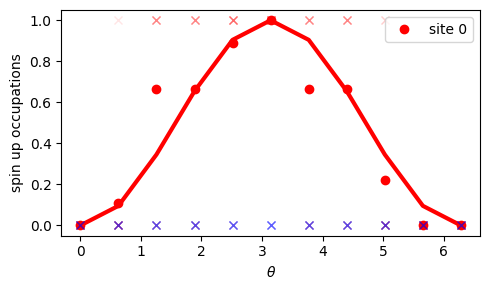

In [68]:
n0s = measurements[:,:,0];
n1s = measurements[:,:,1];
f, ax = plt.subplots(figsize=(5,3))
ax.plot(phases, n0s, 'rx', alpha = 0.1)
ax.plot(phases, n0s.mean(axis=1), 'ro', label = "site 0")
ax.plot(phases, (1-np.cos(phases))/2, 'r-', lw = 3)
ax.plot(phases, n1s, 'bx', alpha = 0.1)
ax.set_ylabel(r'spin up occupations')
ax.set_xlabel('$\\theta$')
ax.legend()
f.tight_layout()

## Ramsey

We can also test a compination of $RX$ and $RZ$ gate through a Ramsey sequence, which we specify below.

In [69]:
n_phases = 11 # number of phases we would like to investigate
phases = np.linspace(0,2*np.pi,n_phases) #array of phases
job_payload = {}

for ii in range(n_phases):
    exp_str = 'experiment_' + str(ii)
    dummy_exp = {
            'instructions': [
                ('rx', [0], [np.pi/2]),
                ('rz', [0], [phases[ii]]),
                ('rx', [0], [np.pi/2]),
                ('measure', [0], []),
                ('measure', [1], []),
            ],
            'num_wires': 2,
            'shots': 9
    }
    job_payload[exp_str] = dummy_exp
pprint(job_payload)

{'experiment_0': {'instructions': [('rx', [0], [1.5707963267948966]),
                                   ('rz', [0], [0.0]),
                                   ('rx', [0], [1.5707963267948966]),
                                   ('measure', [0], []),
                                   ('measure', [1], [])],
                  'num_wires': 2,
                  'shots': 9},
 'experiment_1': {'instructions': [('rx', [0], [1.5707963267948966]),
                                   ('rz', [0], [0.6283185307179586]),
                                   ('rx', [0], [1.5707963267948966]),
                                   ('measure', [0], []),
                                   ('measure', [1], [])],
                  'num_wires': 2,
                  'shots': 9},
 'experiment_10': {'instructions': [('rx', [0], [1.5707963267948966]),
                                    ('rz', [0], [6.283185307179586]),
                                    ('rx', [0], [1.5707963267948966]),
                       

In [70]:
url= url_prefix + "post_job"

pprint(url)
job_response = requests.post(url, json={'job':json.dumps(job_payload),'username': username,'password':password})
job_id = (job_response.json())['job_id']
print(job_response.json())

'http://localhost:8000/api/v1/rydberg/post_job'
{'job_id': '20230301_163601-rydberg-freddy-aed4a', 'status': 'INITIALIZING', 'detail': 'Got your json.', 'error_message': 'None'}


In [71]:
url= url_prefix + "get_job_status" 

status_response = requests.get(url, params={'job_id': job_id,'username': username,'password':password})

print(status_response.text)

{"job_id": "20230301_163601-rydberg-freddy-aed4a", "status": "INITIALIZING", "detail": "Got your json.", "error_message": "None"}


In [74]:
url= url_prefix + "get_job_result" 
result_response = requests.get(url, params={'job_id': job_id,'username': username,'password':password})

results_dict  = result_response.json()
pprint(results_dict)

{'backend_name': 'alqor_rydberg_simulator',
 'backend_version': '0.0.1',
 'header': {},
 'job_id': '20230301_163601-rydberg-freddy-aed4a',
 'qobj_id': None,
 'results': [{'data': {'memory': ['1 0',
                                  '1 0',
                                  '1 0',
                                  '1 0',
                                  '1 0',
                                  '1 0',
                                  '1 0',
                                  '1 0',
                                  '1 0']},
              'header': {'extra metadata': 'text', 'name': 'experiment_0'},
              'shots': 9,
              'success': True},
             {'data': {'memory': ['1 0',
                                  '1 0',
                                  '1 0',
                                  '1 0',
                                  '1 0',
                                  '1 0',
                                  '1 0',
                                  '1 0',
          

and make the results pretty

In [75]:
measurements = []
for res in results_dict["results"]:
    shots = np.array(res['data']['memory'])
    shots = [shot.split(' ') for shot in shots]
    #print(shots.shape)
    for ii, el in enumerate(shots):
        shots[ii] = [int(meas) for meas in el]
    measurements.append(shots)
    
measurements = np.array(measurements)

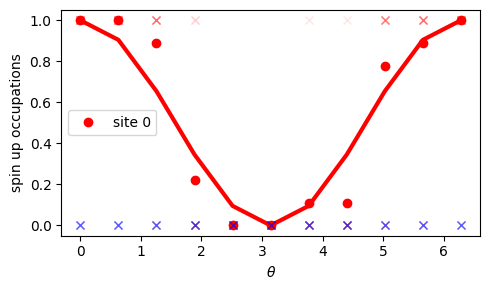

In [77]:
n0s = measurements[:,:,0];
n1s = measurements[:,:,1];
f, ax = plt.subplots(figsize=(5,3))
ax.plot(phases, n0s, 'rx', alpha = 0.1)
ax.plot(phases, n0s.mean(axis=1), 'ro', label = "site 0")
ax.plot(phases, (1+np.cos(phases))/2, 'r-', lw = 3)
ax.plot(phases, n1s, 'bx', alpha = 0.1)
ax.set_ylabel(r'spin up occupations')
ax.set_xlabel('$\\theta$')
ax.legend()
f.tight_layout()

# Blockade

The most interesting part is the Rydberg blockade. 

In [78]:
n_phases = 11 # number of phases we would like to investigate
phases = np.linspace(0,2*np.pi,n_phases) #array of phases
job_payload = {}

for ii in range(n_phases):
    exp_str = 'experiment_' + str(ii)
    dummy_exp = {
            'instructions': [
                ('ufull', [0,1], [phases[ii], 0, 0]),
                ('measure', [0], []),
                ('measure', [1], []),
            ],
            'num_wires': 2,
            'shots': 12
    }
    job_payload[exp_str] = dummy_exp
pprint(job_payload)

{'experiment_0': {'instructions': [('ufull', [0, 1], [0.0, 0, 0]),
                                   ('measure', [0], []),
                                   ('measure', [1], [])],
                  'num_wires': 2,
                  'shots': 12},
 'experiment_1': {'instructions': [('ufull',
                                    [0, 1],
                                    [0.6283185307179586, 0, 0]),
                                   ('measure', [0], []),
                                   ('measure', [1], [])],
                  'num_wires': 2,
                  'shots': 12},
 'experiment_10': {'instructions': [('ufull',
                                     [0, 1],
                                     [6.283185307179586, 0, 0]),
                                    ('measure', [0], []),
                                    ('measure', [1], [])],
                   'num_wires': 2,
                   'shots': 12},
 'experiment_2': {'instructions': [('ufull',
                               

In [79]:
url= url_prefix + "post_job"

pprint(url)
job_response = requests.post(url, json={'job':json.dumps(job_payload),'username': username,'password':password})
job_id = (job_response.json())['job_id']
print(job_response.json())

'http://localhost:8000/api/v1/rydberg/post_job'
{'job_id': '20230302_094444-rydberg-freddy-0772c', 'status': 'INITIALIZING', 'detail': 'Got your json.', 'error_message': 'None'}


In [81]:
url= url_prefix + "get_job_status" 

status_response = requests.get(url, params={'job_id': job_id,'username': username,'password':password})

print(status_response.text)

{"job_id": "20230302_094444-rydberg-freddy-0772c", "status": "DONE", "detail": "None; Passed json sanity check; Compilation done. Shots sent to solver.", "error_message": "None"}


In [82]:
url= url_prefix + "get_job_result" 
result_response = requests.get(url, params={'job_id': job_id,'username': username,'password':password})

results_dict  = result_response.json()
pprint(results_dict)

{'backend_name': 'alqor_rydberg_simulator',
 'backend_version': '0.0.1',
 'header': {},
 'job_id': '20230302_094444-rydberg-freddy-0772c',
 'qobj_id': None,
 'results': [{'data': {'memory': ['0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0']},
              'header': {'extra metadata': 'text', 'name': 'experiment_0'},
              'shots': 12,
              'success': True},
             {'data': {'memory': ['0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
         

In [83]:
measurements = []
for res in results_dict["results"]:
    shots = np.array(res['data']['memory'])
    shots = [shot.split(' ') for shot in shots]
    #print(shots.shape)
    for ii, el in enumerate(shots):
        shots[ii] = [int(meas) for meas in el]
    measurements.append(shots)
    
measurements = np.array(measurements)

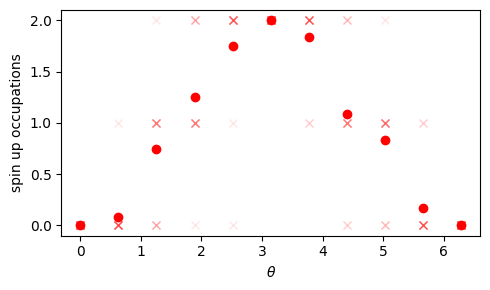

In [85]:
n0s = measurements[:,:,0];
n1s = measurements[:,:,1];
n_tot = n0s + n1s
f, ax = plt.subplots(figsize=(5,3))
ax.plot(phases, n_tot, 'rx', alpha = 0.1)
ax.plot(phases, n_tot.mean(axis=1), 'ro')
ax.set_ylabel(r'spin up occupations')
ax.set_xlabel('$\\theta$')
f.tight_layout()

In [87]:
np.random.rand()

0.18708892589381332

In [88]:
n_phases = 11 # number of phases we would like to investigate
phases = np.linspace(0,2*np.pi,n_phases) #array of phases
job_payload = {}

for ii in range(n_phases):
    exp_str = 'experiment_' + str(ii)
    dummy_exp = {
            'instructions': [
                ('ufull', [0,1], [phases[ii], 0, phases[ii]*1e4+np.random.rand()]),
                ('measure', [0], []),
                ('measure', [1], []),
            ],
            'num_wires': 2,
            'shots': 12
    }
    job_payload[exp_str] = dummy_exp
pprint(job_payload)

{'experiment_0': {'instructions': [('ufull',
                                    [0, 1],
                                    [0.0, 0, 0.963615960979872]),
                                   ('measure', [0], []),
                                   ('measure', [1], [])],
                  'num_wires': 2,
                  'shots': 12},
 'experiment_1': {'instructions': [('ufull',
                                    [0, 1],
                                    [0.6283185307179586, 0, 6283.860574640941]),
                                   ('measure', [0], []),
                                   ('measure', [1], [])],
                  'num_wires': 2,
                  'shots': 12},
 'experiment_10': {'instructions': [('ufull',
                                     [0, 1],
                                     [6.283185307179586, 0, 62831.86860728114]),
                                    ('measure', [0], []),
                                    ('measure', [1], [])],
                   'num_

In [89]:
url= url_prefix + "post_job"

pprint(url)
job_response = requests.post(url, json={'job':json.dumps(job_payload),'username': username,'password':password})
job_id = (job_response.json())['job_id']
print(job_response.json())

'http://localhost:8000/api/v1/rydberg/post_job'
{'job_id': '20230303_061948-rydberg-freddy-89855', 'status': 'INITIALIZING', 'detail': 'Got your json.', 'error_message': 'None'}


In [108]:
url= url_prefix + "get_job_status" 

status_response = requests.get(url, params={'job_id': job_id,'username': username,'password':password})

print(status_response.text)

{"job_id": "20230303_061948-rydberg-freddy-89855", "status": "DONE", "detail": "None; Passed json sanity check; Compilation done. Shots sent to solver.", "error_message": "None"}


In [109]:
url= url_prefix + "get_job_result" 
result_response = requests.get(url, params={'job_id': job_id,'username': username,'password':password})

results_dict_with_int  = result_response.json()
pprint(results_dict_with_int)

{'backend_name': 'alqor_rydberg_simulator',
 'backend_version': '0.0.1',
 'header': {},
 'job_id': '20230303_061948-rydberg-freddy-89855',
 'qobj_id': None,
 'results': [{'data': {'memory': ['0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0',
                                  '0 0']},
              'header': {'extra metadata': 'text', 'name': 'experiment_0'},
              'shots': 12,
              'success': True},
             {'data': {'memory': ['0 1',
                                  '0 1',
                                  '0 1',
                                  '0 1',
                                  '0 0',
         

In [112]:
measurements = []
for res in results_dict_with_int["results"]:
    shots = np.array(res['data']['memory'])
    shots = [shot.split(' ') for shot in shots]
    #print(shots.shape)
    for ii, el in enumerate(shots):
        shots[ii] = [int(meas) for meas in el]
    measurements.append(shots)
    
measurements = np.array(measurements)

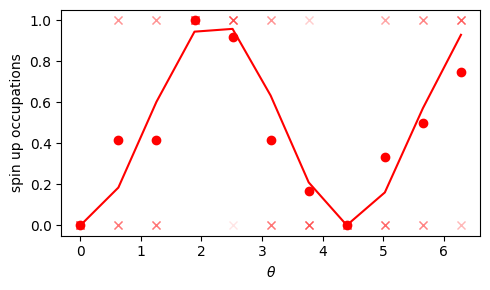

In [117]:
n0s = measurements[:,:,0];
n1s = measurements[:,:,1];
n_tot = n0s + n1s
f, ax = plt.subplots(figsize=(5,3))
ax.plot(phases, n_tot, 'rx', alpha = 0.1)
ax.plot(phases, n_tot.mean(axis=1), 'ro')
ax.plot(phases, (1-np.cos(np.sqrt(2)*phases))/2, 'r-')
ax.set_ylabel(r'spin up occupations')
ax.set_xlabel('$\\theta$')
f.tight_layout()